**6375 ML - Assignment 1**

Aaryan Singh - axc230019

Nikunj Gohil - ndg220000


---


To run the program, press the play button next to each code container.

**Part 1**

**Implementing Linear Regression using Gradient Descent**

---

Importing all the necessary libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Dataset - The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.

Importing the dataset. And reading it into a dataframe.

---



In [ ]:
url = 'https://github.com/aaryans99/CS-6375-Machine-Learning/raw/main/Real%20estate%20valuation%20data%20set.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Getting the correlation between each pair of variables. This helps us get an idea which two variables are positively realted and can be used for regression.

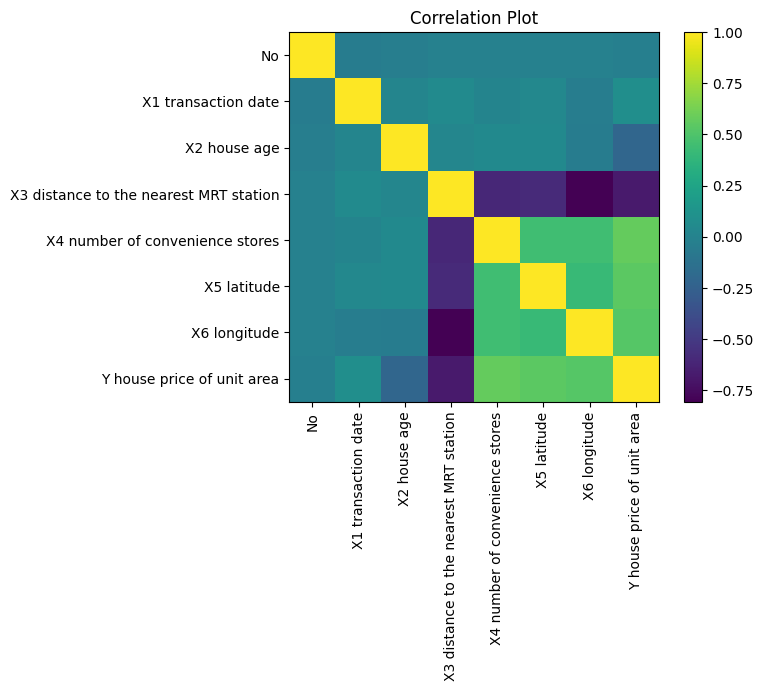

                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 lat

In [ ]:
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Plot')
plt.show()

print(corr_matrix)

Based on correlation data, we select "X4 number of convenience stores", "X5 latitude" and "X6 longtitude" as our attributes to predict "Y house price of unit area"

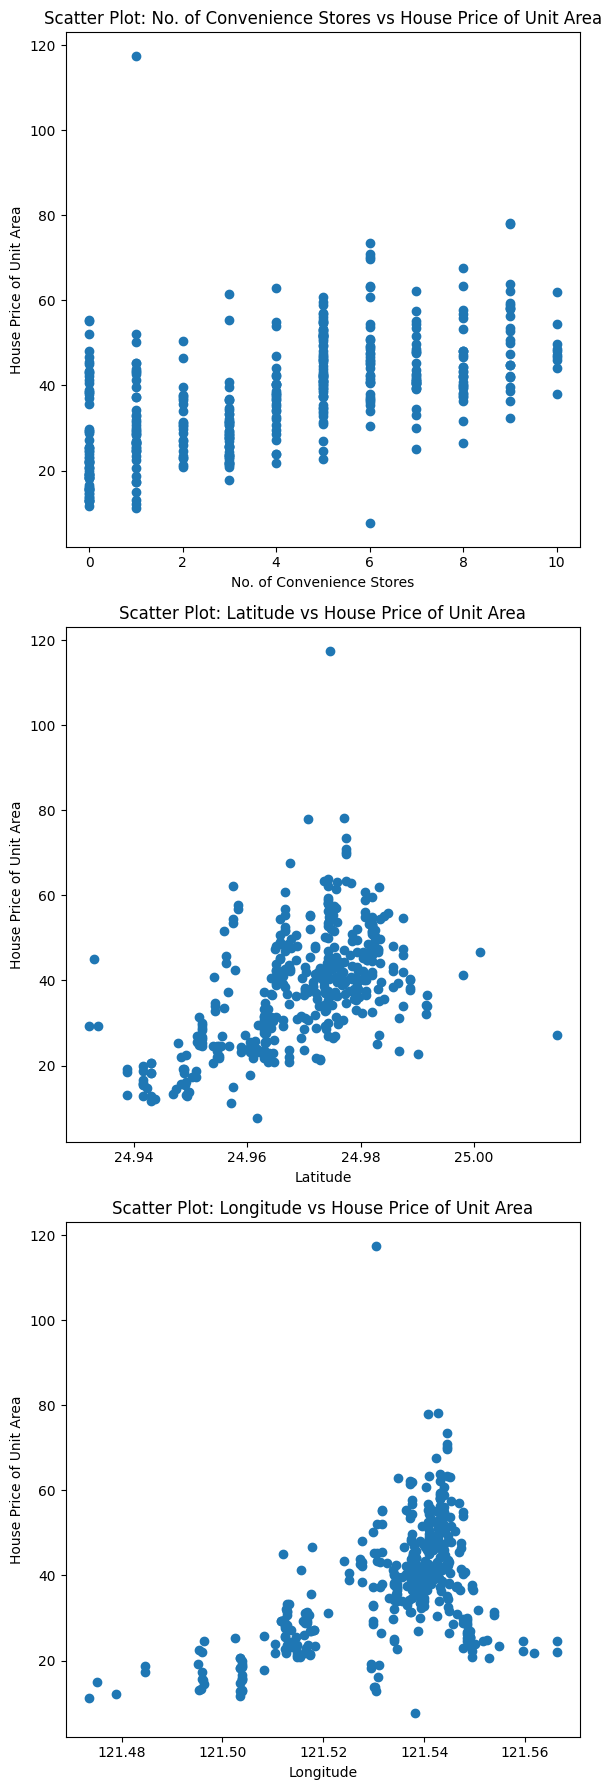

In [ ]:
X_list = [df['X4 number of convenience stores'], df['X5 latitude'], df['X6 longitude']]
labels = ['No. of Convenience Stores', 'Latitude', 'Longitude']

fig, axs = plt.subplots(len(X_list), 1, figsize=(6, 6*len(X_list)))

for i, X in enumerate(X_list):
    y = df['Y house price of unit area']
    axs[i].scatter(X, y)
    axs[i].set_xlabel(labels[i])
    axs[i].set_ylabel('House Price of Unit Area')
    axs[i].set_title(f'Scatter Plot: {labels[i]} vs House Price of Unit Area')

plt.tight_layout()
plt.show()


Standardizing the features by removing the mean and scaling to unit variance.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

We extract the three attributes ( variables ) and split the complete dataset into two parts namely, training data and test data.

In [ ]:
Y = scaled_df['Y house price of unit area']
X = scaled_df[['X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
scaled_df.info()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Set:")
print(np.shape(X_train))
print(np.shape(Y_train))
print("\nTesting Set:")
print(np.shape(X_test))
print(np.shape(Y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    float64
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    float64
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(8)
memory usage: 26.0 KB
Training Set:
(331, 3)
(331,)

Testing Set:
(83, 3)
(83,)


Defining the method for gradient descent which will be used for minimsing the model error. This in turn will improve our model and help predict more accurately.

In [ ]:
def gradient_descent(X_train, Y_train, X_test, Y_test, iterations, learning_rate):
    m = np.ones(X_train.shape[1])
    c = 0
    n = X_train.shape[0]
    #Here n is the number of entries

    for i in range(iterations):
        Y_predict_train = np.dot(X_train, m) + c
        Dm = -(2/n) * np.dot(X_train.T, (Y_train-Y_predict_train))
        Dc = -(2/n) * np.sum(Y_train-Y_predict_train)
        m  = m-learning_rate * Dm
        c  = c-learning_rate * Dc

    Y_predict_train = np.dot(X_train, m) + c
    r2_train = r2_score(Y_train, Y_predict_train)
    rmse_train = mean_squared_error(Y_train, Y_predict_train)

    Y_predict_test = np.dot(X_test, m) + c
    r2_test = r2_score(Y_test, Y_predict_test)
    rmse_test = mean_squared_error(Y_test, Y_predict_test)

    return r2_train, r2_test, rmse_train, rmse_test

Running a few iterations of gradient descent with different learning rates.

In [ ]:
iterations = 1
n = len(Y)
learning_rates = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

for iteration in range(1, 7):
    for learning_rate in learning_rates:
        r2_train, r2_test, rmse_train, rmse_test = gradient_descent(X_train, Y_train, X_test, Y_test, iterations, learning_rate)
        print(f"Iteration: {iteration}, Learning Rate: {learning_rate}")
        print(f"Training: R2 - {r2_train}, RMSE - {rmse_train} ; Testing: R2 - {r2_test}, RMSE - {rmse_test}")

Iteration: 1, Learning Rate: 0.0005
Training: R2 - -2.253531956218783, RMSE - 3.313448052010075 ; Testing: R2 - -2.688396737676391, RMSE - 3.350299311559675
Iteration: 1, Learning Rate: 0.001
Training: R2 - -2.2436286433429866, RMSE - 3.3033623626121176 ; Testing: R2 - -2.676218809263372, RMSE - 3.3392376747347647
Iteration: 1, Learning Rate: 0.005
Training: R2 - -2.165056377684935, RMSE - 3.223343133021006 ; Testing: R2 - -2.5796098579013527, RMSE - 3.2514843970213207
Iteration: 1, Learning Rate: 0.01
Training: R2 - -2.0684766389831823, RMSE - 3.1249848100135136 ; Testing: R2 - -2.460884858554171, RMSE - 3.1436423420941257
Iteration: 1, Learning Rate: 0.05
Training: R2 - -1.3612624642015723, RMSE - 2.4047467852094124 ; Testing: R2 - -1.5925324579904312, RMSE - 2.354887591260937
Iteration: 1, Learning Rate: 0.1
Training: R2 - -0.6408040828056003, RMSE - 1.6710206523438875 ; Testing: R2 - -0.7107109428200402, RMSE - 1.553898374180386
Iteration: 2, Learning Rate: 0.0005
Training: R2 - -2

Generating our model. The model consists of the intercept and the weights corresponding to each attribute. THe model generated is used to predict the values of y of training and test data set. The errors between actual and predicted values of y is also calculated to help us determine the performance of the model.

Intercept:  0.008983567035570274 Coefficients:  [0.32246052 0.29880211 0.2457697 ]




Text(0, 0.5, 'MSE')

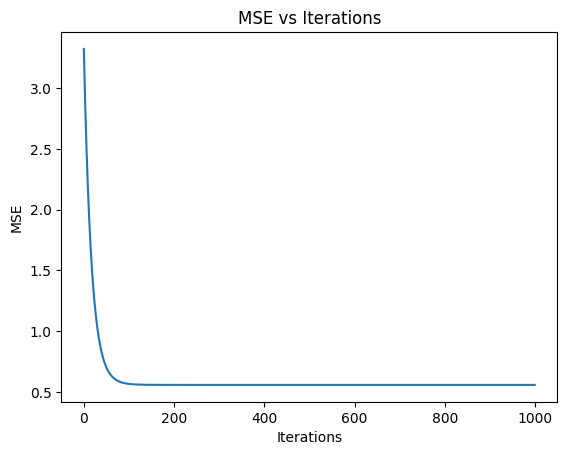

In [ ]:
iterations = 1000
learning_rate = 0.01
c=0
iterations_list = []
mse_array = []
m = np.ones(X.shape[1])

for i in range(iterations):
    Y_pred_train = np.dot(X_train, m) + c
    Dm = -(2/n) * np.dot(X_train.T, (Y_train-Y_pred_train))
    Dc = -(2/n) * np.sum(Y_train-Y_pred_train)
    m  = m-learning_rate * Dm
    c  = c-learning_rate * Dc
    iterations_list.append(i)
    mse_array.append(mean_squared_error(Y_pred_train, Y_train))

print("Intercept: ", c, "Coefficients: ", m)
print("\n")

plt.plot(iterations_list, mse_array)
plt.title('MSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')


In [ ]:
print("Errors for training data set")
rmse = (np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
r2 = r2_score(Y_train, Y_pred_train)
print(f"Root Mean Squared Error is {rmse}")
print(f"R2 score is {r2}")
print("\n")

print("Errors for test data set")
Y_pred_test = X_test.dot(m)+c
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred_test)))
r2 = r2_score(Y_test, Y_pred_test)
print(f"Root Mean Squared Error is {rmse}")
print(f"R2 score is {r2}")

Errors for training data set
Root Mean Squared Error is 0.7461267500961289
R2 score is 0.45336160605669473


Errors for test data set
Root Mean Squared Error is 0.6080607087998984
R2 score is 0.5929498642158737


**6. Answer this question: Are you satisfied that you have found the best
solution? Explain.**

---

Ans:
No, we haven't found the best solution. Since regression problems are continuous in nature, one cannot say that the best model was generated without the means to back it up. To show that the model is best, one has to provide the different cases that were tested, what changes were made and how the current model outperforms the rest. Also, why a better model is not possible. Hence we say that our model is not the only one and not the best one. But, yes we are satisfied with the model generated as the values predicted are not deviating too much from the actual values which is supported by the small errors.

**Part 2**

**Implementing Linear Regression using Libraries**

---

Generating a model for predicting the y label "House price of unit area" using  SGD Regressor model of scikit. And testing the performance of that model.

In [ ]:
model = SGDRegressor(alpha=0.0000001, eta0=0.001, max_iter = 10000000, tol = 0.000001)

model.fit(X_train, Y_train)

print("Intercept: ", model.intercept_, "Coefficient: ", model.coef_)
# model evaluation for training set
Y_pred_train = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
r2 = r2_score(Y_train, Y_pred_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Y_pred_test = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred_test)))
r2 = r2_score(Y_test, Y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Intercept:  [0.00939486] Coefficient:  [0.31811056 0.29740779 0.24979852]
The model performance for training set
--------------------------------------
RMSE is 0.7461267500961289
R2 score is 0.45336160605669473


The model performance for testing set
--------------------------------------
RMSE is 0.6080269233770929
R2 score is 0.5929950964720716


**6. Answer this question: Are you satisfied that you have found the best
solution? Explain.**

---

Ans:
No, we haven't found the best solution. Since regression problems are continuous in nature, one cannot say that the best model was generated without the means to back it up. Since we have used a library we can confidentl say that the model generated is better than most. But, the working of each library differs and the tuning can also be changed, we again need concrete evidence to say the current model is best. We can say the current model outperforms the model generated above and that both models are good since their errors are low meaning good performance.